# Start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# We load the dataset which was downloaded from kaggle
# We can see there is only for five columns in which four of them are meaningful
# CustomerID is the unique identifier of each customer in the dataset, so we used it as a index column

In [2]:
df = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


# We'll have a quick look as our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.mean(axis= 0, skipna=True)

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

# By using matplotlib and seaborn libraries, we can visualize our data to understand how it is distributed

Text(0.5, 1.0, 'Distribution of Age in respect for the Annual Income')

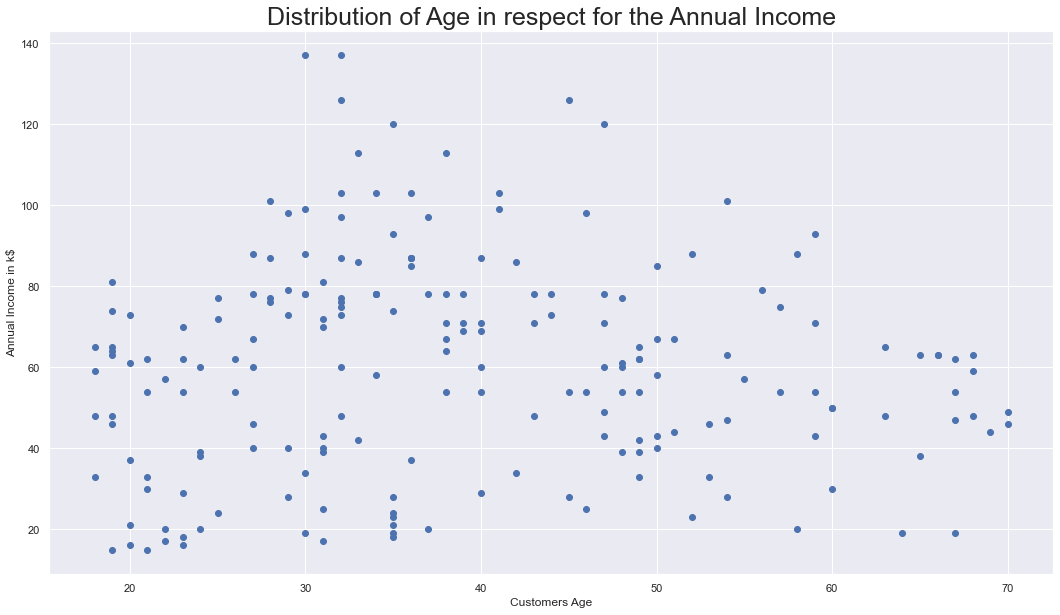

In [5]:
plt.figure(figsize=(18,10))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Customers Age')
plt.ylabel('Annual Income in k$')
plt.title('Distribution of Age in respect for the Annual Income', fontsize = 25)

Text(0.5, 1.0, 'Distribution of Age')

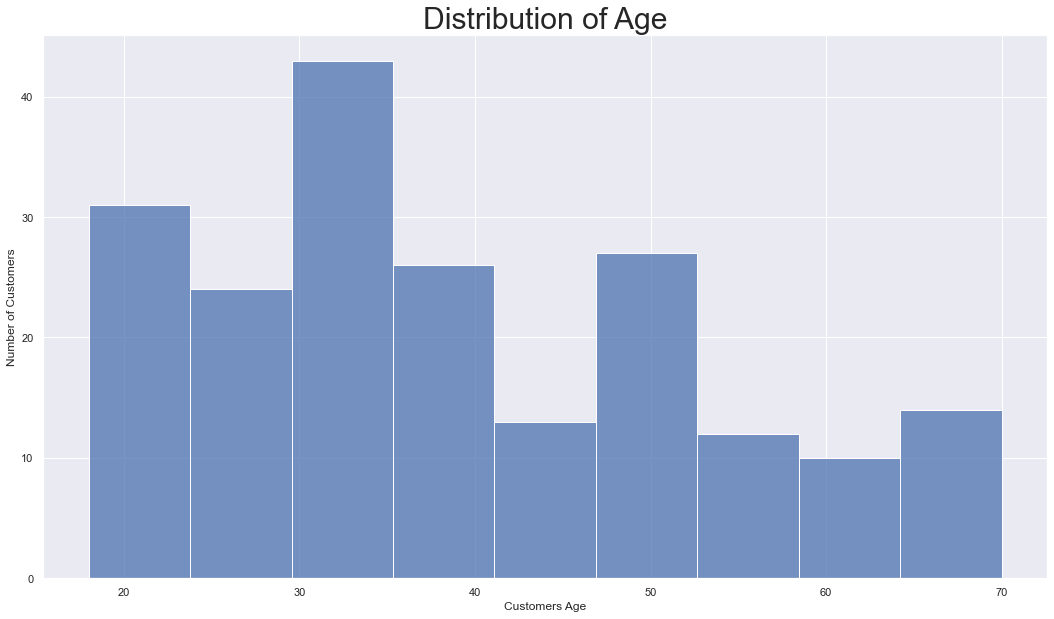

In [6]:
plt.figure(figsize=(18,10))
sns.histplot(df['Age'])
plt.xlabel('Customers Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age', fontsize = 30)

Text(0.5, 1.0, 'Distribution of Annual Income')

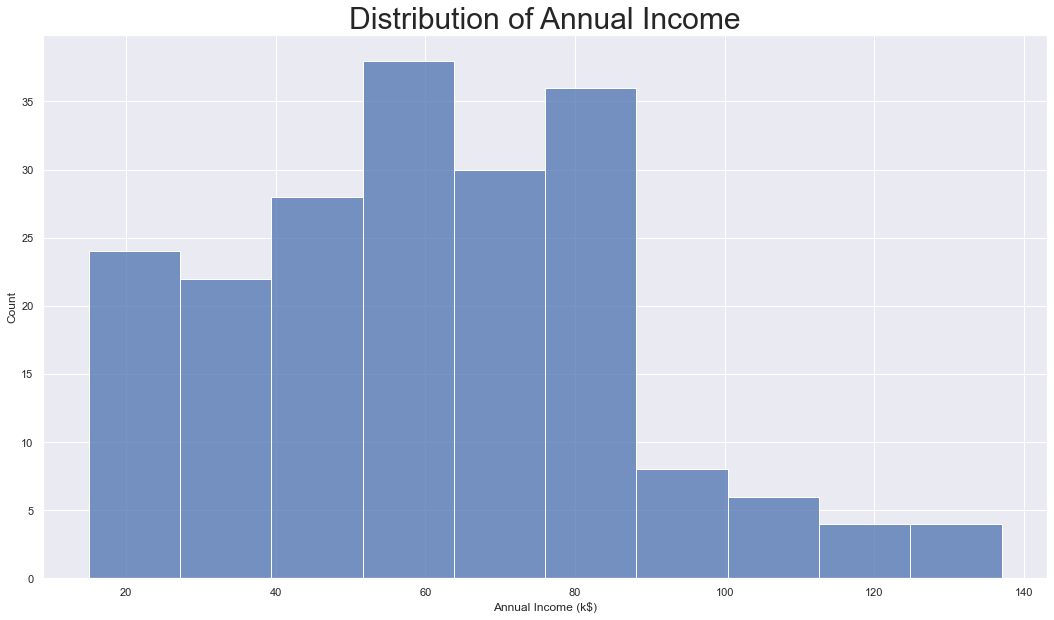

In [7]:
plt.figure(figsize=(18,10))
sns.histplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 30)


Text(0.5, 1.0, 'Distribution of Spending Score')

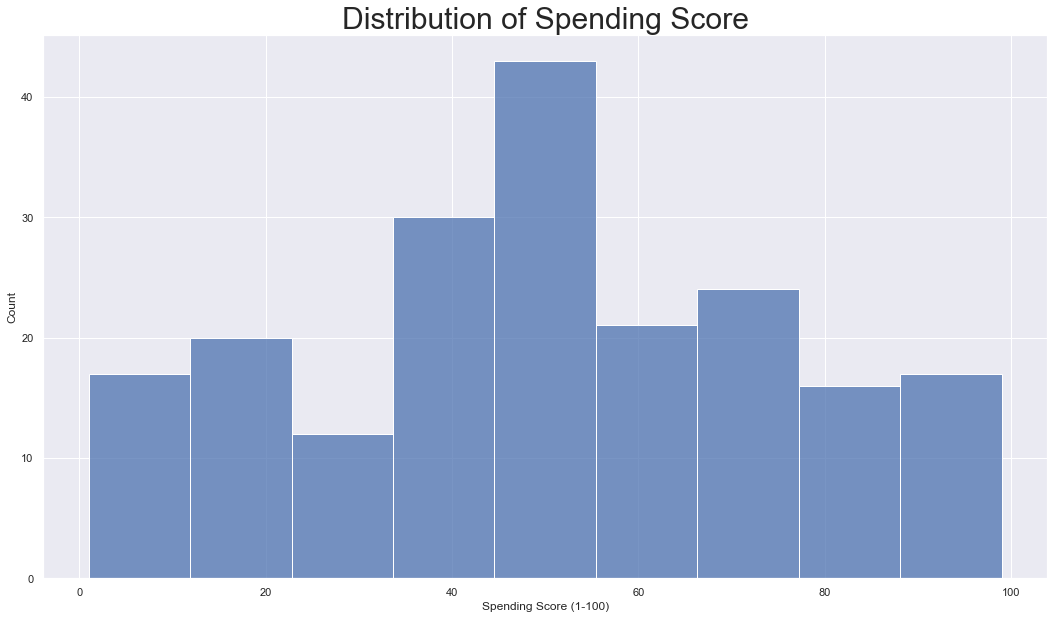

In [8]:
plt.figure(figsize=(18,10))
sns.histplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 30)

In [9]:
df_1 = df.copy()
df_1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


# The variable 'gender' is categorical, and we need to transform this into a numeric variable.

# This means that we need to substitute numbers for each category. We can do this with Pandas using pd.get_dummies().

In [10]:
df_gender = pd.get_dummies(df_1['Gender'])
df_new = pd.concat([df_1,df_gender], axis = 1)


In [11]:
df_new = df_new.drop(['Gender', 'Female'], axis = 1)
df_new.rename(columns = {'Male':'is_male'}, inplace = True)

In [12]:
df_new

,Age,Annual Income (k$),Spending Score (1-100),is_male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


# Then by importing the StandardScaler from Sklearn, First, lets standardize all variables in the dataset to get them around the same scale.

In [13]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df_new)
print(df_scaled)

[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]
 [-1.20926872 -1.66266033  1.00159627 -0.88640526]
 [-0.27630176 -1.62449091 -1.71591298 -0.88640526]
 [-1.13750203 -1.62449091  1.70038436 -0.88640526]
 [ 1.80493225 -1.58632148 -1.83237767  1.12815215]
 [-0.6351352  -1.58632148  0.84631002 -0.88640526]
 [ 2.02023231 -1.58632148 -1.4053405   1.12815215]
 [-0.27630176 -1.58632148  1.89449216 -0.88640526]
 [ 1.37433211 -1.54815205 -1.36651894 -0.88640526]
 [-1.06573534 -1.54815205  1.04041783 -0.88640526]
 [-0.13276838 -1.54815205 -1.44416206  1.12815215]
 [-1.20926872 -1.54815205  1.11806095  1.12815215]
 [-0.27630176 -1.50998262 -0.59008772 -0.88640526]
 [-1.3528021  -1.50998262  0.61338066  1.12815215]
 [ 0.94373197 -1.43364376 -0.82301709  1.12815215]
 [-0.27630176 -1.43364376  1.85

# By using the popular unsupervised learning technique called K-Means clustering.

# This algorithm can take in unlabelled customer data and assign each data point to clusters.

# The goal of K-Means is to group all the data available into non-overlapping sub-groups that are distinct from each other.

In [14]:
max_clusters = 40

In [15]:
k_means_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [k_means_tests[i].fit(df_scaled).inertia_ for i in range(len(k_means_tests))]

# We visualize the model's performance.
# Using the elbow method, we can see that the number of clusters is about 10.

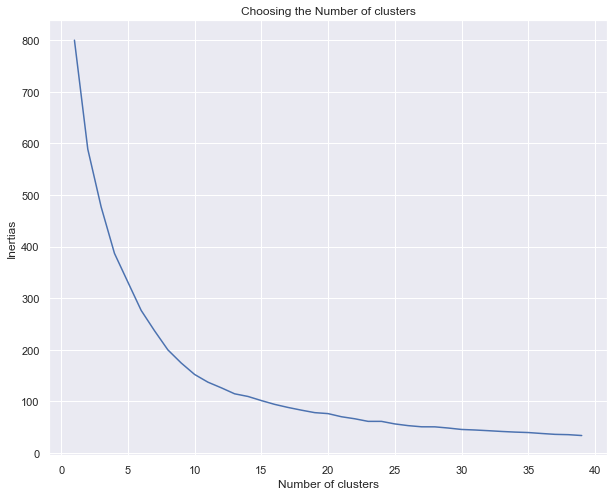

In [16]:
plt.figure(figsize=(10,8))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.title('Choosing the Number of clusters')
plt.show()

# After the number of clusters, we fit our data to the KMean model and we predict their clusters' category number.

In [17]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=10)

In [18]:
clusters = kmeans.predict(df_scaled)
clusters

array([3, 3, 6, 5, 6, 5, 6, 5, 7, 5, 7, 5, 6, 5, 6, 3, 6, 3, 7, 5, 3, 3,
       6, 3, 6, 3, 6, 3, 6, 5, 7, 5, 7, 3, 6, 5, 6, 5, 6, 5, 1, 3, 7, 4,
       6, 5, 1, 4, 4, 4, 1, 3, 4, 7, 1, 7, 1, 7, 4, 7, 7, 3, 1, 1, 7, 3,
       1, 1, 3, 4, 7, 1, 1, 1, 7, 3, 1, 3, 4, 1, 7, 3, 7, 1, 4, 7, 1, 4,
       4, 1, 1, 3, 7, 4, 4, 3, 1, 4, 7, 3, 4, 1, 7, 3, 7, 4, 1, 7, 7, 7,
       7, 4, 4, 3, 4, 4, 1, 1, 1, 1, 3, 4, 4, 0, 4, 8, 2, 0, 7, 0, 2, 0,
       4, 8, 2, 8, 9, 0, 2, 8, 9, 0, 4, 8, 2, 0, 2, 8, 9, 0, 2, 0, 9, 8,
       9, 8, 2, 8, 2, 8, 9, 8, 2, 8, 2, 8, 2, 8, 9, 0, 2, 0, 2, 0, 9, 8,
       2, 0, 2, 0, 9, 8, 2, 8, 9, 0, 9, 0, 9, 8, 9, 8, 2, 8, 9, 8, 9, 0,
       2, 0])

# The cluster_centers help us see the center point of every cluster group

In [19]:
kmeans.cluster_centers_

array([[-0.39989994,  1.01344075,  1.26040667,  1.12815215],
       [ 1.09300668, -0.27940022, -0.02639866, -0.88640526],
       [-0.02700694,  0.96701244, -1.39716754,  1.12815215],
       [-0.97602698, -0.73705168,  0.41603773,  1.12815215],
       [-0.78153925, -0.12214217, -0.11957041, -0.88640526],
       [-0.96084556, -1.33087991,  1.17778643, -0.88640526],
       [ 0.16967696, -1.31640908, -1.1668652 , -0.7425083 ],
       [ 1.43505777, -0.45298304, -0.40195247,  1.12815215],
       [-0.47793198,  0.97284787,  1.22158511, -0.88640526],
       [ 0.41265847,  1.21277   , -1.11029664, -0.88640526]])

# To better visualize our data, and since we have 4 features, we can use PCA to reduce the dimension from 4 to 2.
# PCA is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.
# By lowering the dimensions to 2 and using the cluster groups, we create a DataFrame of 3 columns that we can better visualize 

In [20]:
pca = PCA(n_components = 2)

reduced_data = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1','PC2'])
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [21]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-0.88272588,  1.65431318],
       [ 0.56402657, -0.88554419],
       [ 1.19961046,  1.30582744],
       [-0.68838314,  0.28733559],
       [-0.662429  , -0.58044771],
       [-1.6696024 , -1.35294268],
       [ 0.75229959, -1.61087948],
       [ 1.5303687 ,  0.17028966],
       [-1.38150389,  0.3644368 ],
       [ 0.83149037,  0.21501655]])

In [22]:
reduced_data['Cluster'] = clusters
reduced_data

,PC1,PC2,Cluster
0,-0.406383,-0.520714,3
1,-1.427673,-0.367310,3
2,0.050761,-1.894068,6
3,-1.694513,-1.631908,5
4,-0.313108,-1.810483,6
...,...,...,...
195,-1.179572,1.324568,8
196,0.672751,1.221061,9
197,-0.723719,2.765010,0
198,0.767096,2.861930,2


# Data Visualization

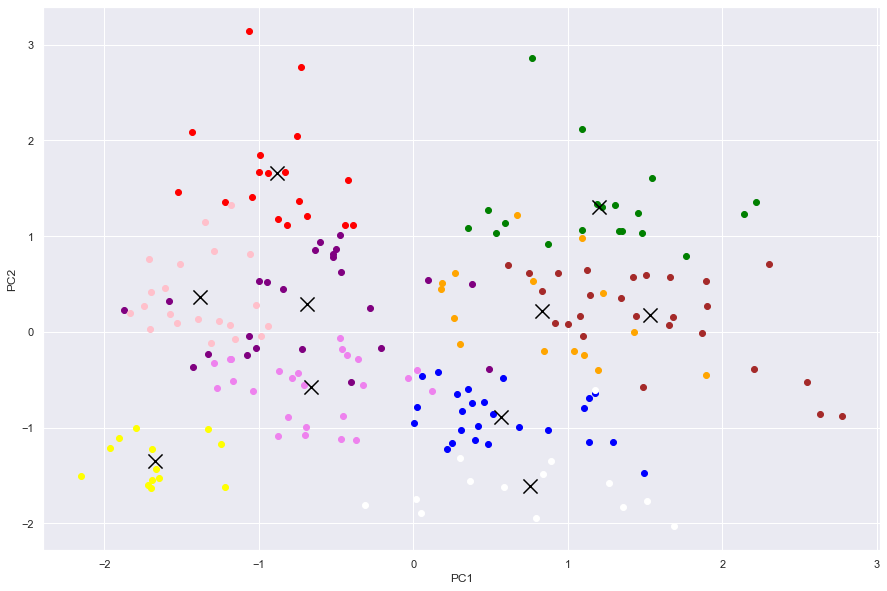

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[reduced_data['Cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 0].loc[:, 'PC2'], color = 'red')
plt.scatter(reduced_data[reduced_data['Cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 1].loc[:, 'PC2'], color = 'blue')
plt.scatter(reduced_data[reduced_data['Cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 2].loc[:, 'PC2'], color = 'green')
plt.scatter(reduced_data[reduced_data['Cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 3].loc[:, 'PC2'], color = 'purple')
plt.scatter(reduced_data[reduced_data['Cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 4].loc[:, 'PC2'], color = 'violet')
plt.scatter(reduced_data[reduced_data['Cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 5].loc[:, 'PC2'], color = 'yellow')
plt.scatter(reduced_data[reduced_data['Cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 6].loc[:, 'PC2'], color = 'white')
plt.scatter(reduced_data[reduced_data['Cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 7].loc[:, 'PC2'], color = 'brown')
plt.scatter(reduced_data[reduced_data['Cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 8].loc[:, 'PC2'], color = 'pink')
plt.scatter(reduced_data[reduced_data['Cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['Cluster'] == 9].loc[:, 'PC2'], color = 'orange')


plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color = 'black', marker= 'x', s = 200)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()
